In [1]:
# Start writing code here...
!pip install Missingno

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
import missingno as m


<AxesSubplot:>

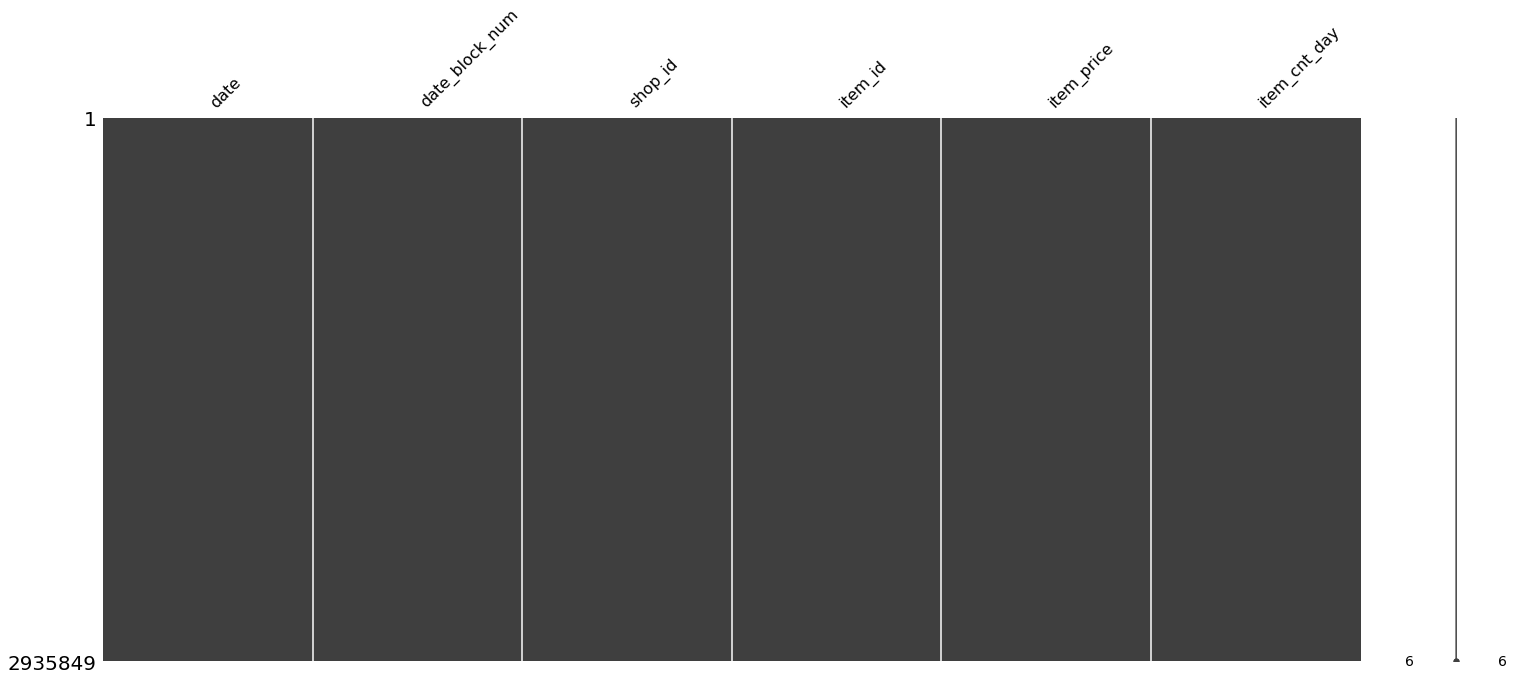

In [3]:
import pandas as pd
train = pd.read_csv('sales_train.csv')
m.matrix(train)

In [4]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


<AxesSubplot:>

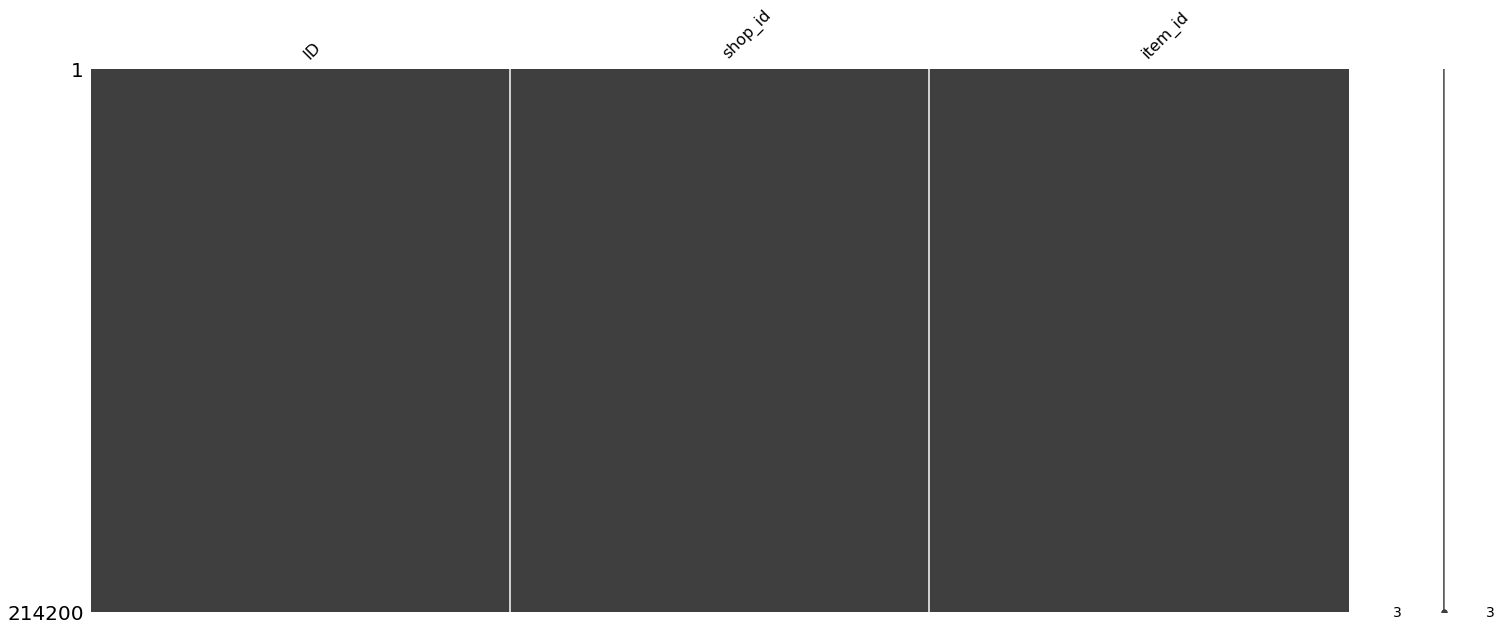

In [5]:
test = pd.read_csv('test.csv')
m.matrix(test)

<AxesSubplot:>

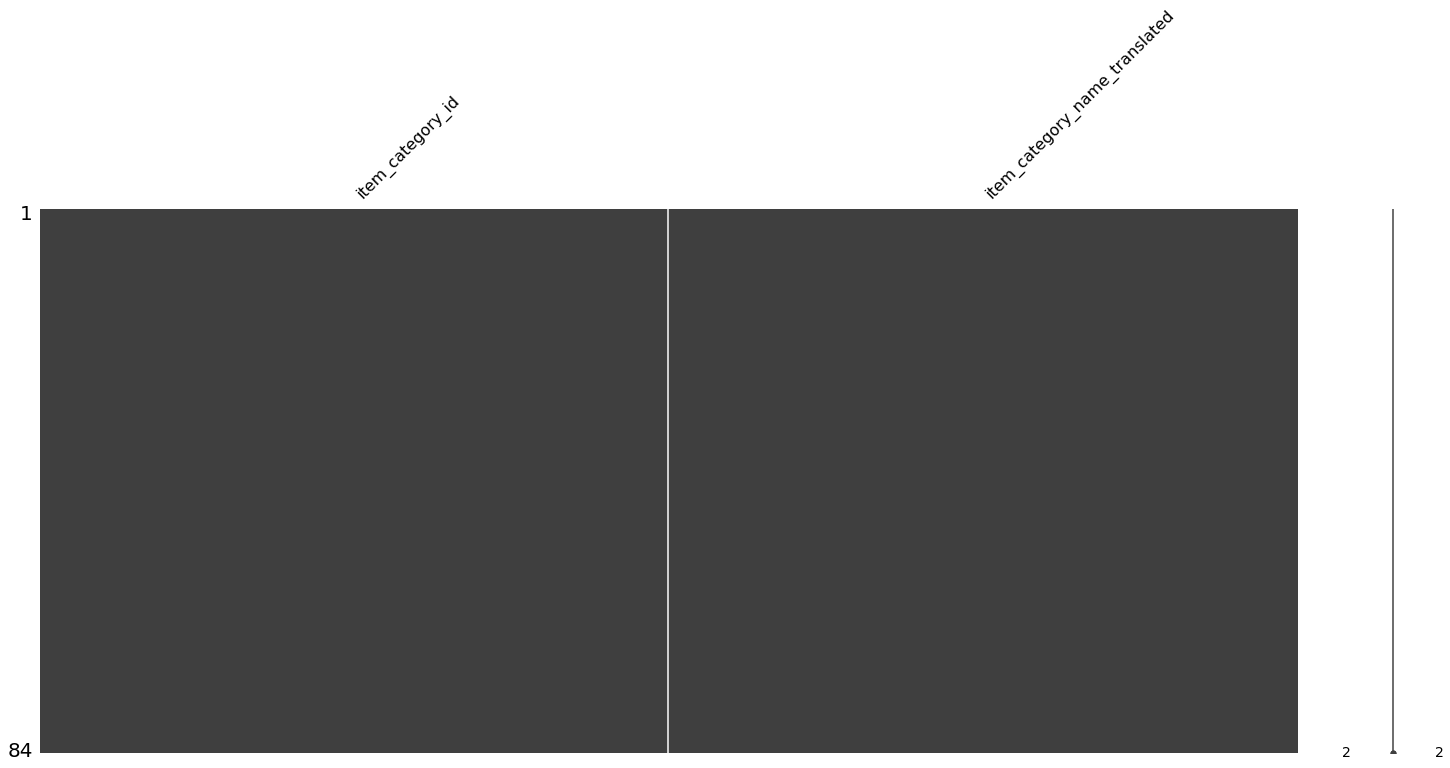

In [6]:
item_categories = pd.read_csv('item_categories-translated.csv')
item_categories.shape
m.matrix(item_categories)

In [7]:
train.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')

In [8]:
## exploring the sum,max,min and mean price based on shop id
price = train.groupby(['shop_id']).item_price.agg(['sum','min','max','mean']).reset_index()
price.head()

,shop_id,sum,min,max,mean
0,0,5.553869e+06,13.0,15653.0,563.444151
1,1,2.926161e+06,13.0,15653.0,515.350652
2,2,3.510444e+07,0.1,34990.0,1350.638391
3,3,2.647262e+07,0.1,42990.0,1036.840634
4,4,3.533539e+07,0.1,34990.0,923.994318


In [9]:
#exploring the max price of on all shopID
max_price = price.loc[price['sum'] == price['sum'].max()]

In [10]:
##getting to know more information of shop_id 31

shop_id_31 = train.loc[train.shop_id == 31]
shop_id_31.head()


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
60143,03.01.2013,0,31,4906,1794.0,2.0
60144,02.01.2013,0,31,4906,1789.0,1.0
60145,11.01.2013,0,31,4890,799.0,1.0
60146,26.01.2013,0,31,4901,1499.0,1.0
60147,25.01.2013,0,31,4901,1499.0,1.0


In [16]:
##Exploring the monthly max,min and sum of items purchased of shop ID 31
max_items_months = shop_id_31.groupby('date_block_num').item_cnt_day.agg(['sum','max','min'])
max_items_months

,sum,max,min
date_block_num,,,
0,10173.0,64.0,-1.0
1,11160.0,36.0,-1.0
2,12670.0,88.0,-1.0
3,9621.0,24.0,-1.0
4,9423.0,80.0,-1.0
5,10072.0,80.0,-1.0
6,9500.0,50.0,-1.0
7,9882.0,42.0,-1.0
8,11204.0,288.0,-1.0


In [25]:
##
print(max_items_months.loc[max_items_months['sum'] == max_items_months['sum'].max()])
print()
print(max_items_months.loc[max_items_months['max'] == max_items_months['max'].max()])
#print()
#print(max_items_months.loc[max_items_months['min'] == max_items_months['sum'].max()])

                    sum   max  min
date_block_num                    
11              16318.0  81.0 -1.0

                    sum    max  min
date_block_num                     
8               11204.0  288.0 -1.0

Empty DataFrame
Columns: [sum, max, min]
Index: []


In [23]:
train.loc[train.date_block_num == 11].head(1)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1124316,04.12.2013,11,25,17769,199.0,1.0


1)Conclusion 1: Biggest: Shop id 31 has sold 16318.0 items in the month of December, 2013.

2)Conclusion 2: Maximum: Shop id 31 has sold 288.0 items on one day in the month of July, 2013.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=34dbf458-e740-4033-94aa-35edddbb0a31' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>